In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import plotly.express as px
import plotly as plotly
import plotly.graph_objects as go
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv("/Users/vipulpayal/Desktop/Day/#D-5-18.01.2023/survey lung cancer.csv")

In [3]:
data.info

<bound method DataFrame.info of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1    

<b>Note: In the given dataset: <br>Yes = 2<br>No = 1</b>

In [4]:
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<h1>Feature Creation</h1>

In [9]:
X = data.iloc[:,2:15]##independent features
y = data.iloc[:,15]##dependent features

## Training and Splitting the dataset

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [82]:
#feature Scaling
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [83]:
classifier = KNeighborsClassifier(n_neighbors=8, weights = 'uniform', metric='euclidean').fit(X_train,y_train)
y_prediction = classifier.predict(X_test)

In [84]:
y_prediction

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES'],
      dtype=object)

<AxesSubplot: >

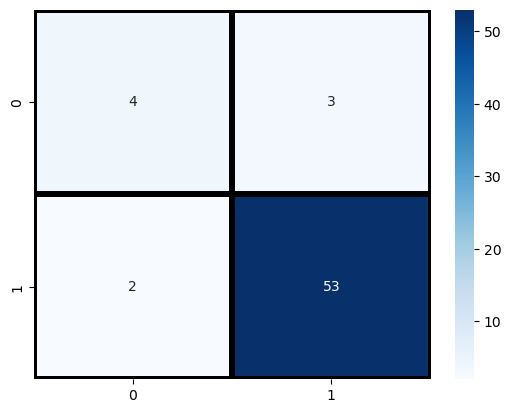

In [87]:
#Confusion Matrix
CM = confusion_matrix(y_test,y_prediction)
sns.heatmap(CM, annot=True, cmap='Blues',
            linewidths = 3, linecolor = 'black')

In [88]:
accuracy = accuracy_score(y_test,y_prediction)

In [89]:
f_score = f1_score(y_test, y_prediction, pos_label='YES')

In [90]:
print("Accuracy : "+str(accuracy*100)+" %")
print("F_Score : "+str(f_score*100)+" %")

Accuracy : 91.93548387096774 %
F_Score : 95.49549549549549 %
